# Combine figures from two Statbank tabeles in one table and one chart
## Example CPI Total and CPI-ATE

Combine data from Statistics Norway's Statbank tables [03013](https://www.ssb.no/en/statbank/table/03013) and [05327](https://www.ssb.no/en/statbank/table/05327)
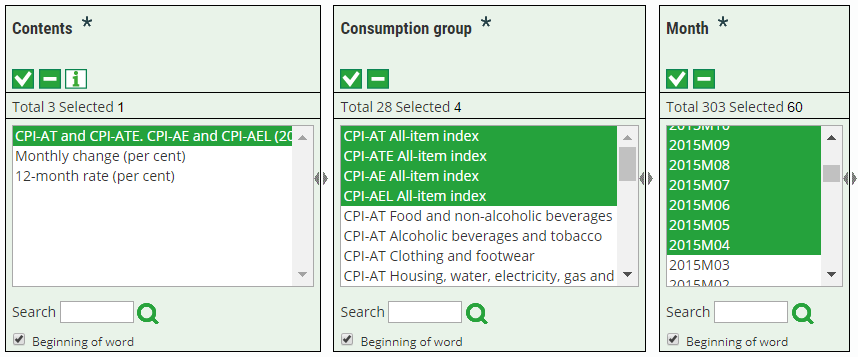

In [1]:
#Import packages

import requests
import pandas as pd
from pyjstat import pyjstat  # pyjstat is for the JSON-stat format
import matplotlib.pyplot as plt

URLs to table metdata, where we post our queries.

In [2]:
URL1 = 'https://data.ssb.no/api/v0/en/table/05327' # KPI-jae
URL2 = 'https://data.ssb.no/api/v0/en/table/03013' # KPI total

API query towards table [05327](https://www.ssb.no/en/statbank/table/05327) - latest 5 years (60 months), using filter "top" 

In [3]:
q1 = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": ['JA_TOTAL', 'JAE_TOTAL', 'JE_TOTAL', 'JEL_TOTAL']
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": ["KPIJustIndMnd"]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "top",
        "values": [ "60" ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

API query in JSON towards table [03013](https://www.ssb.no/en/statbank/table/03013) latest 5 years

In [4]:
q2 = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": ["TOTAL"]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": ["KpiIndMnd"]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "top",
        "values": ["60"]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

Post queries q1 and q2 towards metadata URLs. Results are saved as res1 og res2

In [5]:
res1 = requests.post(URL1, json=q1)
res2 = requests.post(URL2, json=q2)

Reads JSON-stat result with the library pyjstat

In [6]:
ds1 = pyjstat.Dataset.read(res1.text)
ds2 = pyjstat.Dataset.read(res2.text)

Write to to Pandas dataframes, df1 og df2.

In [7]:
df1 = ds1.write('dataframe')
df2 = ds2.write('dataframe')

In [8]:
df1.head(7)

,consumption group,contents,month,value
0,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2017M11,105.9
1,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2017M12,105.9
2,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M01,105.4
3,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M02,106.4
4,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M03,106.7
5,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M04,107.2
6,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M05,107.2


In [9]:
df1.tail() # end of dataset

,consumption group,contents,month,value
235,CPI-AEL All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2022M06,118.9
236,CPI-AEL All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2022M07,120.6
237,CPI-AEL All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2022M08,119.6
238,CPI-AEL All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2022M09,120.9
239,CPI-AEL All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2022M10,121.4


In [10]:
df2.tail(15)

,consumption group,contents,month,value
45,All-item index,Consumer Price Index (2015=100),2021M08,116.3
46,All-item index,Consumer Price Index (2015=100),2021M09,117.5
47,All-item index,Consumer Price Index (2015=100),2021M10,117.2
48,All-item index,Consumer Price Index (2015=100),2021M11,118.1
49,All-item index,Consumer Price Index (2015=100),2021M12,118.9
50,All-item index,Consumer Price Index (2015=100),2022M01,117.8
51,All-item index,Consumer Price Index (2015=100),2022M02,119.1
52,All-item index,Consumer Price Index (2015=100),2022M03,119.8
53,All-item index,Consumer Price Index (2015=100),2022M04,121.2
54,All-item index,Consumer Price Index (2015=100),2022M05,121.5


<AxesSubplot: >

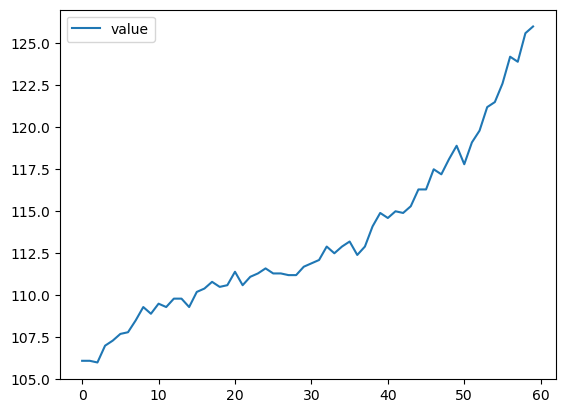

In [11]:
df2.plot()  # here it is only one series 

<AxesSubplot: >

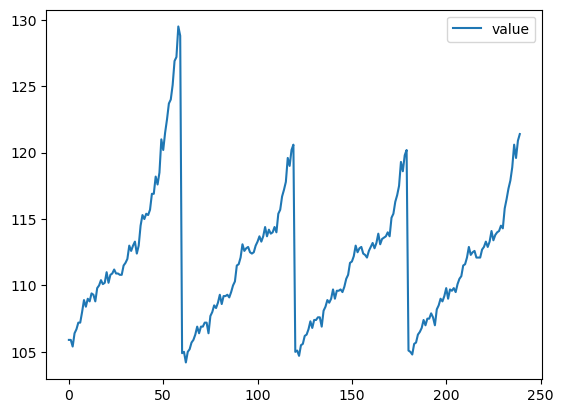

In [12]:
df1.plot() # standard plot shows alle 4 intervals as one line

### Combines the two dataframes  df1 og df2 using simple concat to the dataset "together"

In [13]:
together = pd.concat([df1,df2])

Shows top and tail of the combined dataset

In [14]:
together.head()

,consumption group,contents,month,value
0,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2017M11,105.9
1,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2017M12,105.9
2,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M01,105.4
3,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M02,106.4
4,CPI-AT All-item index,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=1...,2018M03,106.7


In [15]:
together.tail()

,consumption group,contents,month,value
55,All-item index,Consumer Price Index (2015=100),2022M06,122.6
56,All-item index,Consumer Price Index (2015=100),2022M07,124.2
57,All-item index,Consumer Price Index (2015=100),2022M08,123.9
58,All-item index,Consumer Price Index (2015=100),2022M09,125.6
59,All-item index,Consumer Price Index (2015=100),2022M10,126.0


### Pivot table for better view

["tidy data" Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf)


In [16]:
df3 = together.pivot(index='month', columns='consumption group', values='value')

In [17]:
df3.head(3)

consumption group,All-item index,CPI-AE All-item index,CPI-AEL All-item index,CPI-AT All-item index,CPI-ATE All-item index
month,,,,,
2017M11,106.1,105.0,105.1,105.9,104.9
2017M12,106.1,105.1,105.0,105.9,105.0
2018M01,106.0,104.7,104.8,105.4,104.2


In [18]:
df3.index = pd.PeriodIndex(df3.index.str.replace("M", "-"), freq='M')

In [19]:

df3.tail(3)

consumption group,All-item index,CPI-AE All-item index,CPI-AEL All-item index,CPI-AT All-item index,CPI-ATE All-item index
month,,,,,
2022-08,123.9,118.6,119.6,127.2,119.0
2022-09,125.6,119.8,120.9,129.5,120.2
2022-10,126.0,120.2,121.4,128.8,120.6


### Chart made with Pandas' own plot-function 

<AxesSubplot: xlabel='month'>

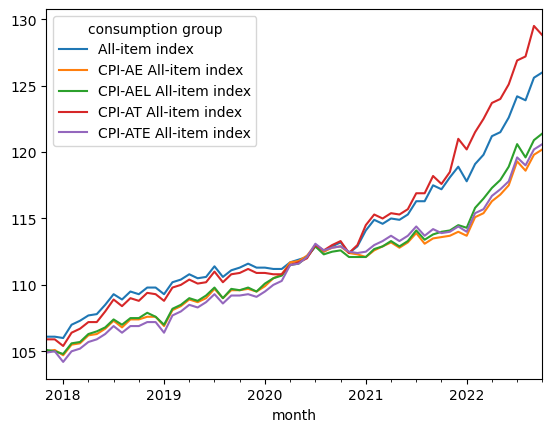

In [20]:
df3.plot()

Plot with more parametres

<AxesSubplot: xlabel='month'>

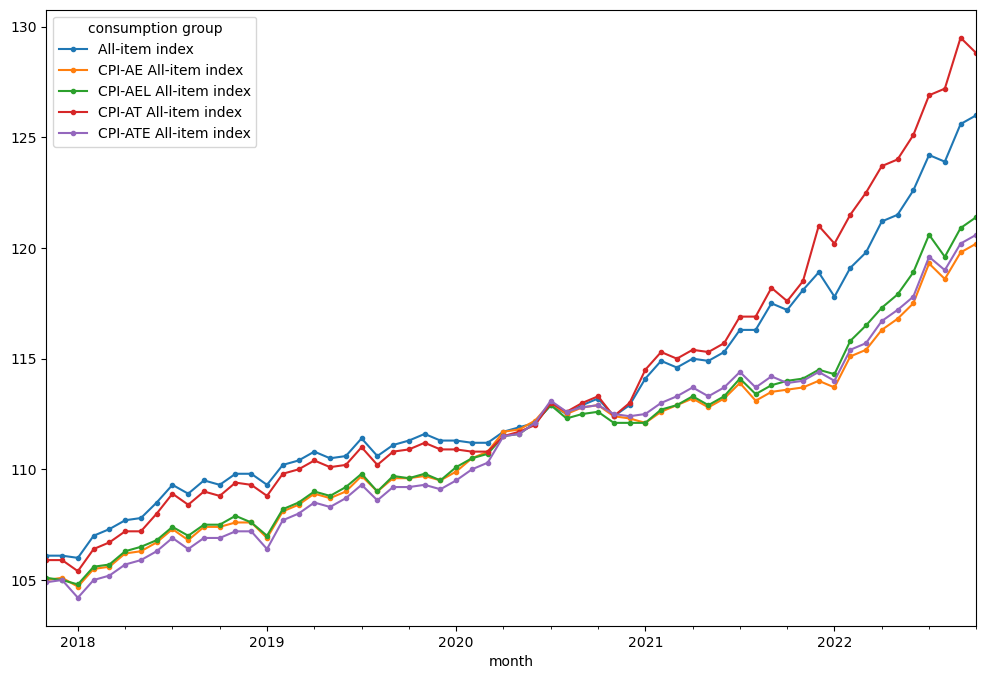

In [21]:
df3.plot(marker="o", markersize=3, figsize=(12, 8))

Display the chart as a function. Here we use the more flexible Matplotlib. You can enter height and width as parameters

In [22]:
def visfigur(bredde=12, hoyde=6):
    fig, ax = plt.subplots(figsize=(bredde, hoyde))  
    #define ssb colors for chart
    ssbCol = {'#1a9d49', '#075745', '#1d9de2', '#0f2080', '#c78800', '#471f00', '#c775a7', '#a3136c', '#909090', '#000000'}
    plt.xlabel('Month') 
    plt.ylabel('index')
    ax.set_title('Chart showing CPI Total and underlying CPI series')
    df3.plot(ax=ax, color=ssbCol)
    plt.show()

### Plot using different styles
In Matplotlib you can try out readymade styles. It is also possible to make one for Statistics Norway's design.

Try out: 'Solarize_Light2',  'bmh', 'classic', 'dark_background' 'fivethirtyeight', seaborn-talk

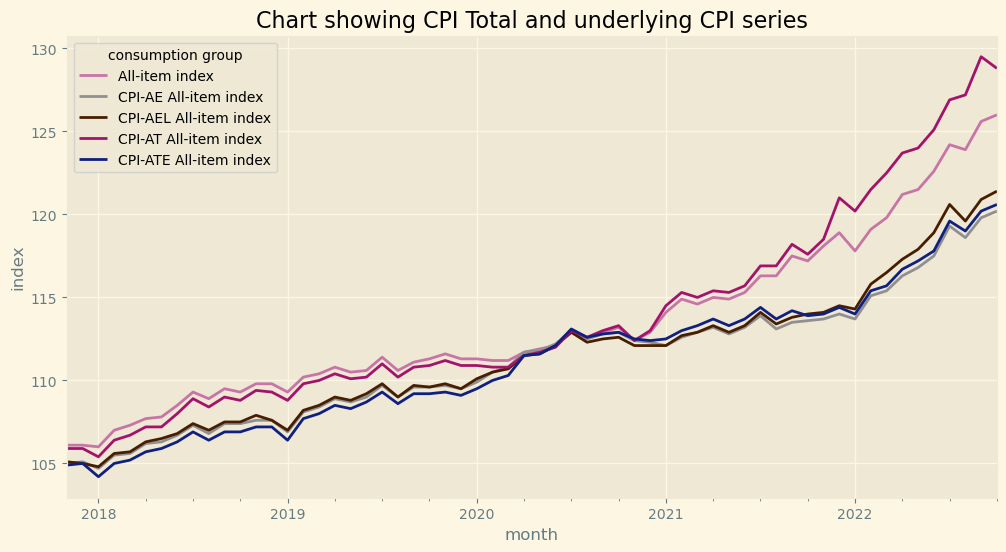

In [23]:
with plt.style.context('Solarize_Light2'):
    visfigur()

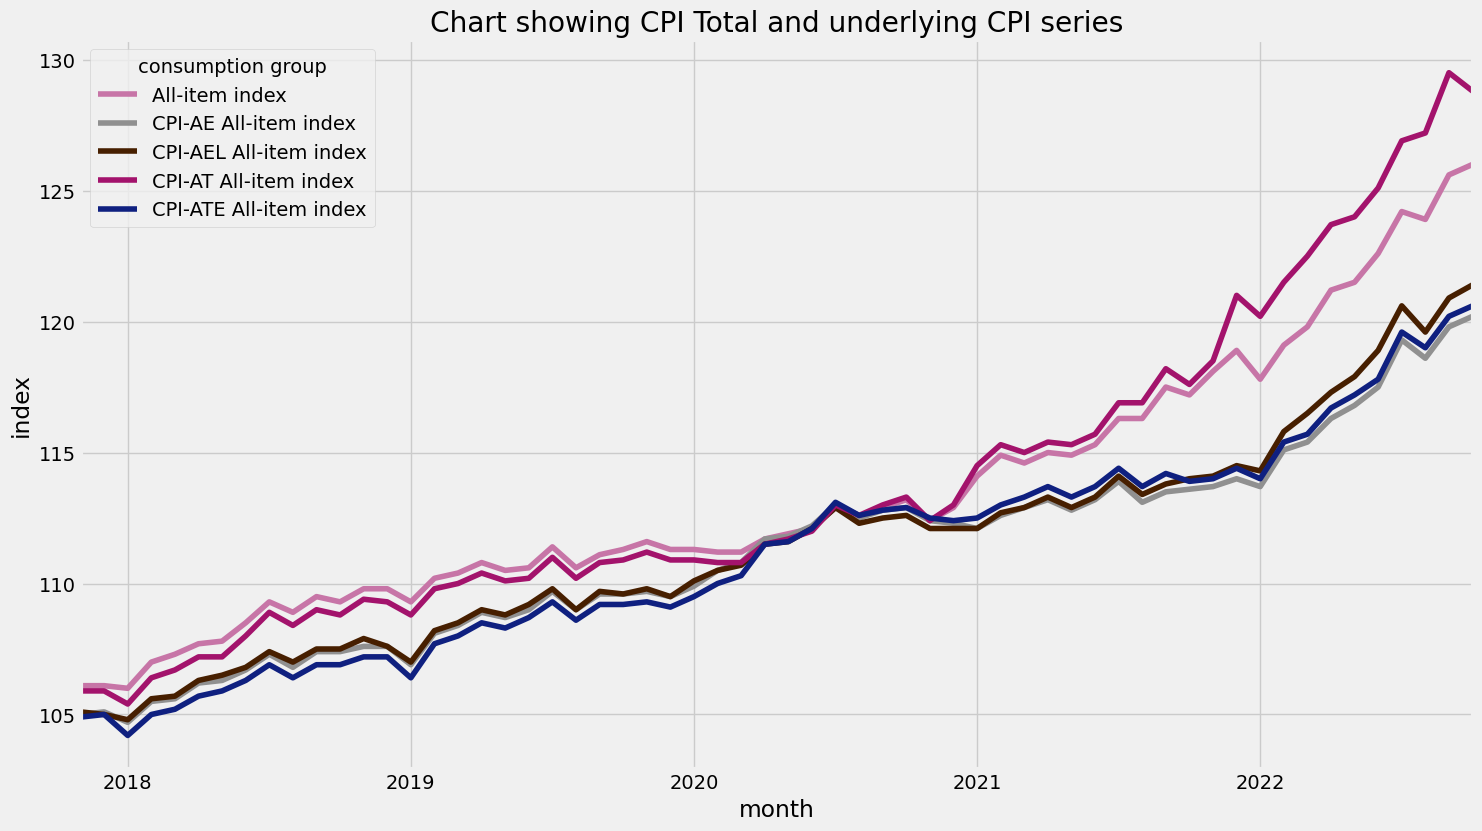

In [24]:
with plt.style.context('fivethirtyeight'):
    visfigur(16, 9)